# **In this Assignment you will perform sentiment analysis on twitter's dataset using Logistic Regression**

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing

#For Preprocessing
import re    # RegEx for removing non-letter characters
import nltk  #natural language processing
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.stem.porter import *


#import any necessary packages if required

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## **Load Tweet dataset download from https://www.kaggle.com/datasets/saurabhshahane/twitter-sentiment-dataset**

In [2]:
import pandas as pd

# Use the correct file ID for downloading from Google Drive
file_id = '1u1XwIqNCndN_ic2YaUuikgnP6GD8Qku8'

# Construct the download link
download_link = f'https://drive.google.com/uc?id={file_id}'

# Use wget to download the file to your Colab environment
!wget $download_link -O data.csv -q

# Load the dataset from the downloaded CSV file
df = pd.read_csv('data.csv')

# Output the first five rows
print(df.head())


                                          clean_text  category
0  when modi promised “minimum government maximum...      -1.0
1  talk all the nonsense and continue all the dra...       0.0
2  what did just say vote for modi  welcome bjp t...       1.0
3  asking his supporters prefix chowkidar their n...       1.0
4  answer who among these the most powerful world...       1.0


<Axes: xlabel='category'>

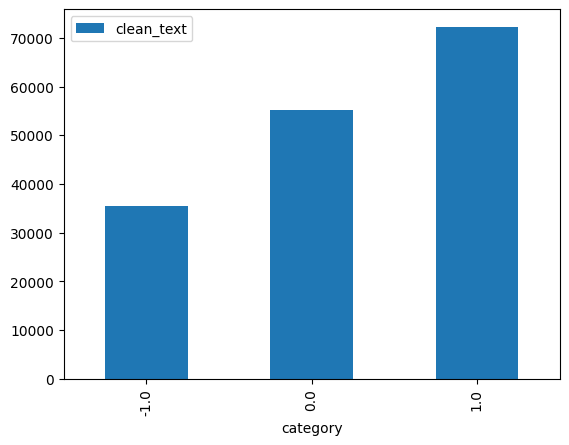

In [3]:
# The distribution of sentiments
df.groupby('category').count().plot(kind='bar')

In [4]:
# Map tweet categories
df['category'] = df['category'].map({-1.0:'Negative', 0.0:'Neutral', 1.0:'Positive'})

# **Visualizing data into wordclouds**

In [5]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
# Write code to generate the word cloud

def wordcount_gen(df, category):
    '''
    Generating Word Cloud
    inputs:
       - df: tweets dataset
       - category: Positive/Negative/Neutral
    '''
    # Filter the dataset based on the specified category
    filtered_df = df[df['category'] == category]

    # Convert 'clean_text' values to strings and filter out NaN values
    filtered_text = filtered_df['clean_text'].apply(lambda x: str(x)).dropna()

    # Combine all the text data for the specified category
    text = ' '.join(filtered_text)

    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(text)

    # Plot the word cloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {category} Sentiment')
    plt.axis('off')
    plt.show()

# Call the function to generate word cloud for a specific category



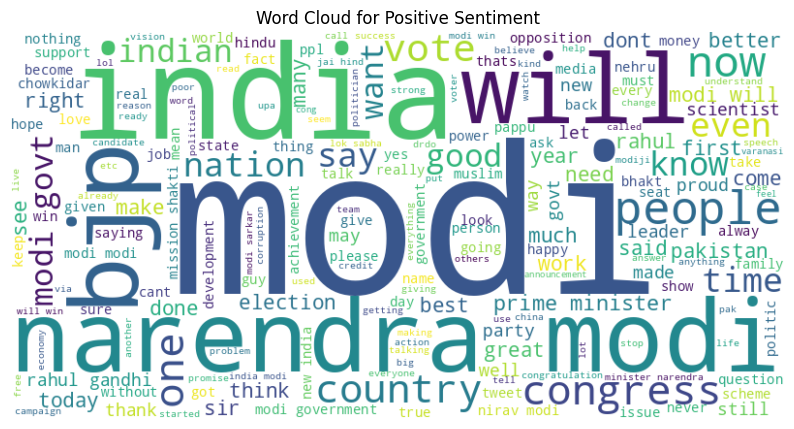

In [6]:
#Generate Positive tweet words cloud
wordcount_gen(df, 'Positive')
#fill code

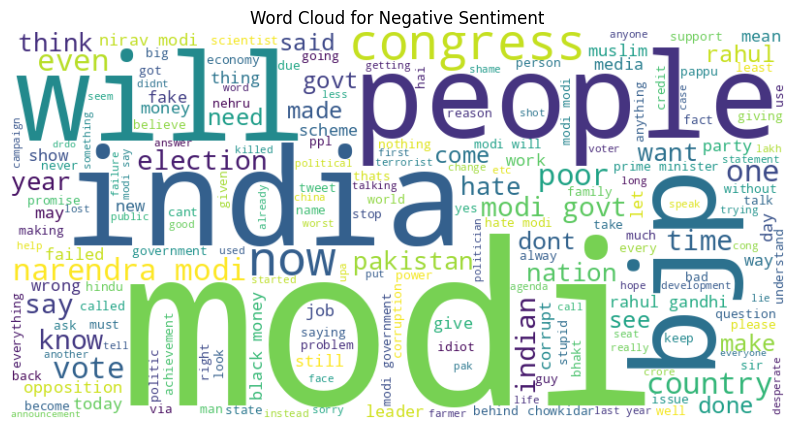

In [7]:
#Generate Negative tweet words cloud
wordcount_gen(df, 'Negative')
#fill code

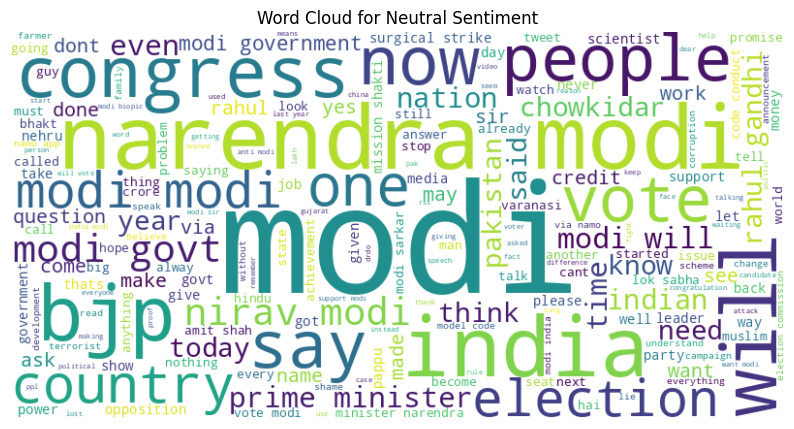

In [8]:
#Generate Neutral tweet words cloud
wordcount_gen(df, 'Neutral')
#fill code

# **Cleaning the tweets using RegEx and NLTK**

In [9]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

nltk.download("stopwords")
stemmer = PorterStemmer()

def tweet_to_words(tweet):
    ''' Convert tweet text into a sequence of cleaned words '''
    # Remove URLs, user mentions, and special characters using RegEx
    tweet = re.sub(r"http\S+|www\S+|@\w+|[^\w\s]", "", tweet)

    # Convert to lowercase
    tweet = tweet.lower()

    # Tokenize the tweet
    words = tweet.split()

    # Remove stopwords and perform stemming
    words = [stemmer.stem(word) for word in words if word not in set(stopwords.words("english"))]

    # Join the cleaned words back into a string
    cleaned_tweet = " ".join(words)

    return cleaned_tweet

print("\nOriginal tweet ->", df['clean_text'][0])
print("\nProcessed tweet ->", tweet_to_words(df['clean_text'][0]))



Original tweet -> when modi promised “minimum government maximum governance” expected him begin the difficult job reforming the state why does take years get justice state should and not business and should exit psus and temples

Processed tweet -> modi promis minimum govern maximum govern expect begin difficult job reform state take year get justic state busi exit psu templ


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
# Apply data processing to each tweet
from sklearn.preprocessing import LabelEncoder

# Encode target labels using scikit learn


# Initialize a LabelEncoder
label_encoder = LabelEncoder()

# Fit the LabelEncoder to your target labels (sentiments)
label_encoder.fit(df['category'])

# Transform the target labels (sentiments) into encoded values
encoded_labels = label_encoder.transform(df['category'])

# Replace the original 'category' column in your DataFrame with the encoded labels
df['encoded_category'] = encoded_labels

# Print the unique classes and their corresponding encoded values
print("Unique classes:", label_encoder.classes_)
print("Encoded classes:", encoded_labels)


#fill code




Unique classes: ['Negative' 'Neutral' 'Positive' nan]
Encoded classes: [0 1 2 ... 1 1 2]


In [15]:
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target labels (y)
X = df['clean_text']  # Assuming 'clean_text' contains your text data
y = df['encoded_category']  # Assuming 'encoded_category' contains the encoded labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting sets to verify the split
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (130384,)
X_test shape: (32596,)
y_train shape: (130384,)
y_test shape: (32596,)


#**Train Test Split for training the Regression model**

In [17]:
from sklearn.feature_extraction.text import CountVectorizer

# Handle missing values by replacing them with an empty string
X_train.fillna("", inplace=True)
X_test.fillna("", inplace=True)

# Initialize a CountVectorizer
count_vectorizer = CountVectorizer()

# Fit and transform the training data
X_train_count = count_vectorizer.fit_transform(X_train)

# Transform the testing data
X_test_count = count_vectorizer.transform(X_test)


In [18]:
from sklearn.linear_model import LogisticRegression

# Initialize a Logistic Regression model
logistic_regression = LogisticRegression(max_iter=1000)  # You can adjust the max_iter as needed

# Fit the model to the training data
logistic_regression.fit(X_train_count, y_train)

# Predict the labels for the testing data
y_pred = logistic_regression.predict(X_test_count)


In [19]:
# Predict using the trained logistic regression model on the testing dataset
y_pred = logistic_regression.predict(X_test_count)

# Now, y_pred contains the predicted labels for the testing dataset


# **Analysing the Results**

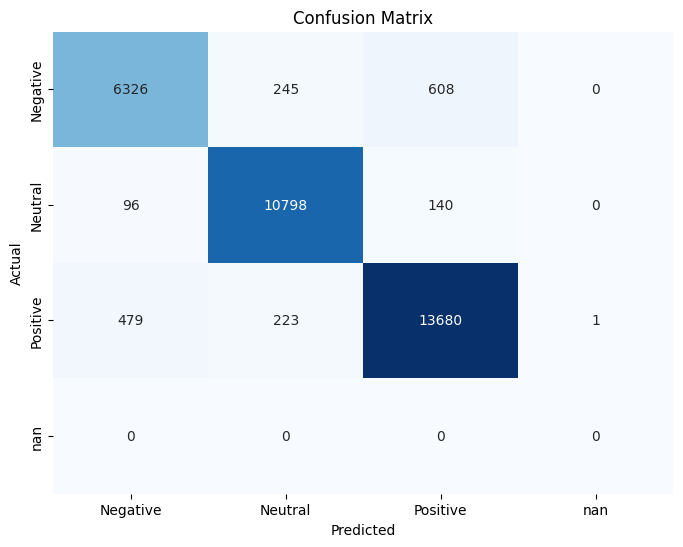

In [20]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [22]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the results
print("Precision:", precision)
print("Recall:", recall)
print("Accuracy % :", accuracy*100)


Precision: 0.9447112267566347
Recall: 0.9450239293164806
Accuracy % : 94.50239293164806


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Hope You Learnt the techniques for sentiment analysis , remember this is just the tip of the iceberg, there is alot to learn.. so keep learning... keep growing :) .